In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Link to data:

https://drive.google.com/file/d/1rolp8QqyKkvxJwlBAPPGtG2f3JA7hMwk/view

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

%matplotlib inline

In [0]:
images_numpy_file = np.load('/content/drive/My Drive/DeepLearningProject_Academics/Data/FaceDetection/images.npy', allow_pickle=True)

In [0]:
images_numpy_file.shape

(409, 2)

In [0]:
images_numpy_file[0][0].shape

(333, 650, 3)

In [0]:
len(images_numpy_file[0][1])

2

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}]


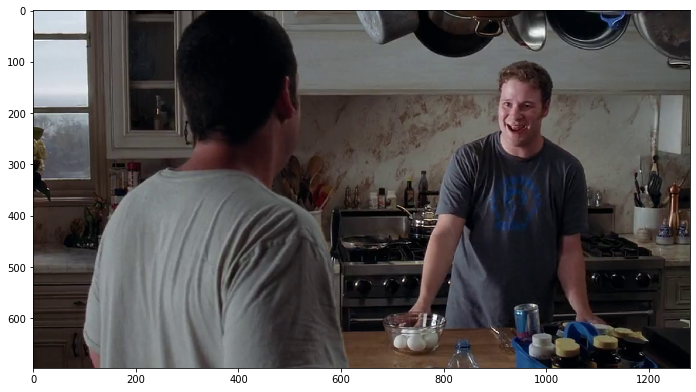

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.46956521739130436, 'y': 0.05}, {'x': 0.6065217391304348, 'y': 0.3333333333333333}], 'imageWidth': 460, 'imageHeight': 240}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6282608695652174, 'y': 0.008333333333333333}, {'x': 0.7456521739130435, 'y': 0.30833333333333335}], 'imageWidth': 460, 'imageHeight': 240}]


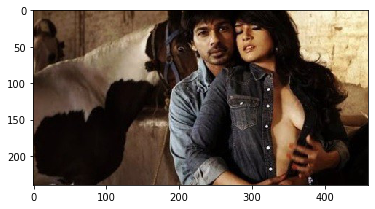

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.495, 'y': 0.27147766323024053}, {'x': 0.595, 'y': 0.46048109965635736}], 'imageWidth': 600, 'imageHeight': 291}]


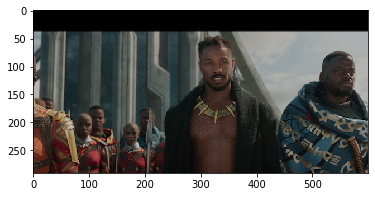

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.5586206896551724, 'y': 0.19938650306748465}, {'x': 0.6603448275862069, 'y': 0.3773006134969325}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.38620689655172413, 'y': 0.18711656441717792}, {'x': 0.4896551724137931, 'y': 0.4049079754601227}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.1724137931034483, 'y': 0.23006134969325154}, {'x': 0.2775862068965517, 'y': 0.44171779141104295}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.7155172413793104, 'y': 0.19938650306748465}, {'x': 0.8448275862068966, 'y': 0.41411042944785276}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.2982758620689655, 'y': 0.44171779141104295}, {'x': 0.4189655172413793, 'y': 0.6533742331288344}], 'imageWidth': 580, 'imageHeight': 326}, {'label': ['Face'], 'notes': '', 'points': [{'

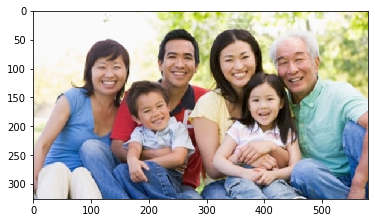

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.486, 'y': 0.046}, {'x': 0.678, 'y': 0.272}], 'imageWidth': 500, 'imageHeight': 500}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.374, 'y': 0.524}, {'x': 0.542, 'y': 0.794}], 'imageWidth': 500, 'imageHeight': 500}]


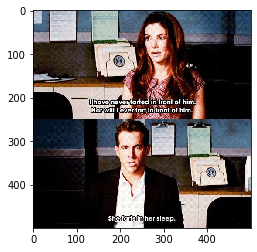

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.09779179810725552, 'y': 0.06162464985994398}, {'x': 0.31230283911671924, 'y': 0.42296918767507}], 'imageWidth': 634, 'imageHeight': 357}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.30441640378548895, 'y': 0.03361344537815126}, {'x': 0.4668769716088328, 'y': 0.4061624649859944}], 'imageWidth': 634, 'imageHeight': 357}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.416403785488959, 'y': 0.48179271708683474}, {'x': 0.5599369085173501, 'y': 0.7871148459383753}], 'imageWidth': 634, 'imageHeight': 357}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.5157728706624606, 'y': 0.21288515406162464}, {'x': 0.6845425867507886, 'y': 0.5798319327731093}], 'imageWidth': 634, 'imageHeight': 357}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6719242902208202, 'y': 0.022408963585434174}, {'x': 0.8012618296529969, 'y': 0.40336134453781514}], 'imageWidth': 634, 'imageHeight': 357}]


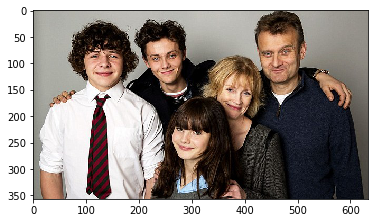

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.46875, 'y': 0.27111111111111114}, {'x': 0.565, 'y': 0.4622222222222222}], 'imageWidth': 800, 'imageHeight': 450}]


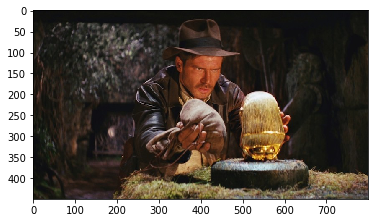

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.136, 'y': 0.32456140350877194}, {'x': 0.4704, 'y': 0.5555555555555556}], 'imageWidth': 625, 'imageHeight': 1026}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.5552, 'y': 0.7066276803118908}, {'x': 0.8608, 'y': 0.8489278752436648}], 'imageWidth': 625, 'imageHeight': 1026}]


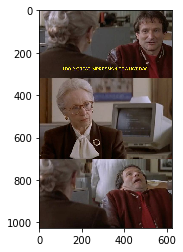

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.13043478260869565, 'y': 0.025547445255474453}, {'x': 0.3858695652173913, 'y': 0.22992700729927007}], 'imageWidth': 184, 'imageHeight': 274}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6141304347826086, 'y': 0.0948905109489051}, {'x': 0.9293478260869565, 'y': 0.38321167883211676}], 'imageWidth': 184, 'imageHeight': 274}]


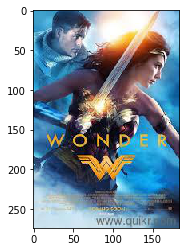

In [0]:
fig=plt.figure(figsize=(40, 40))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    img = images_numpy_file[i][0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    print(images_numpy_file[i][1])
    plt.show()

# There a 2x and 2y if there is a single face in the image, i.e bounding box xmin, xmax & ymin, ymax

In [0]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

In [0]:
masks = np.zeros((int(images_numpy_file.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X_train = np.zeros((int(images_numpy_file.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))

#Creating an initial mask with all zeros in all the pixels. Then using the bounding boxess, we will create 1's in the face
# and zeros's in background

for index in range(images_numpy_file.shape[0]): # Looping through each image
    img = images_numpy_file[index][0] # Getting each image, as index[0] represent image, index[1] represents the metadata of image in our data
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC) #Resizing our image to our defined height and width
    try:
      img = img[:, :, :3]
    except:
      continue
    X_train[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in images_numpy_file[index][1]: #Getting the bounding box co-ordinates
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH) #Get the xmin and normalize the xmin as per the image height and width we have defined
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH) #Get the xMax and normalize the xmax as per the image height and width we have defined
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT) #Get the yMin and normalize the ymin as per the image height and width we have defined
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT) #Get the yMax and normalize the ymax as per the image height and width we have defined
        masks[index][y1:y2, x1:x2] = 1 #Creating 1's in the bounding boxes area in the image

In [0]:
print("Shape of X-Train {}".format(X_train.shape))
print("Shape of masks {}".format(masks.shape))

Shape of X-Train (409, 224, 224, 3)
Shape of masks (409, 224, 224)


In [0]:
masks.shape

(409, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.59215689  0.68627453 -0.08235294]
  [ 0.49019611  0.57647061 -0.17647058]
  [ 0.51372552  0.60784316 -0.13725489]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.66274512  0.74117649 -0.01960784]
  [ 0.54509807  0.64705884 -0.13725489]
  [ 0.47450984  0.56862748 -0.23921567]]

 [[ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  [ 0.96078432  0.96078432  0.96078432]
  ...
  [ 0.7647059   0.82745099  0.05098045]
  [ 0.58431375  0.67058825 -0.17647058]
  [ 0.34901965  0.45098042 -0.48235291]]

 ...

 [[ 0.34901965  0.34901965  0.41960788]
  [ 0.52941179  0.52941179  0.60784316]
  [ 0.28627455  0.28627455  0.34901965]
  ...
  [ 0.14509809 -0.10588235 -0.09803921]
  [-0.69411767 -0.62352943 -0.4588235 ]
  [-0.89019608 -0.74117649 -0.46666664]]

 [

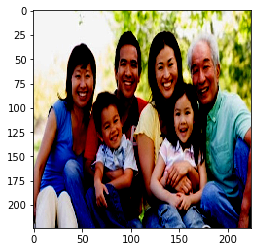

In [0]:
n=4
print(X_train[4])
plt.imshow(X_train[4])

In [0]:
print(masks[4])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


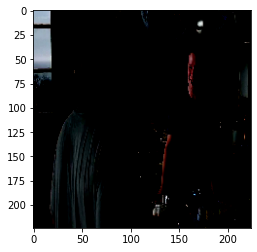


 Showing the masks for the input image


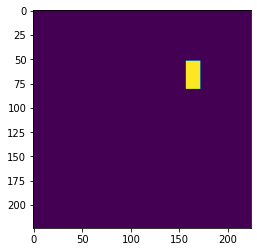


 Showing the input image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


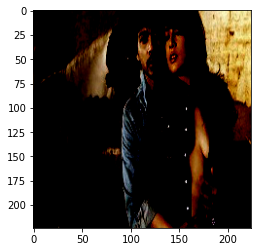


 Showing the masks for the input image


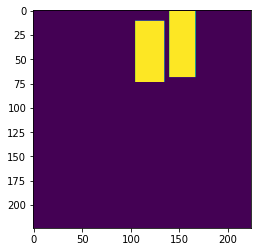

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


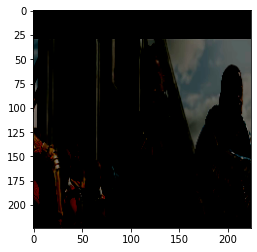


 Showing the masks for the input image


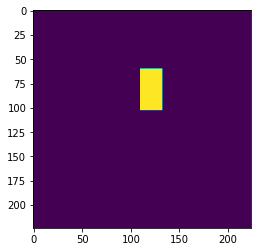

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


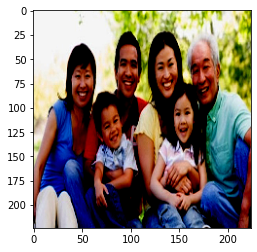


 Showing the masks for the input image


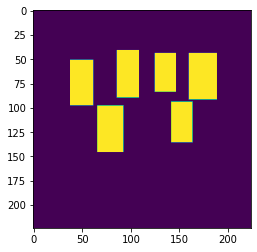


 Showing the input image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


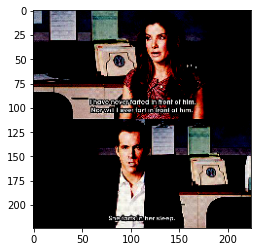


 Showing the masks for the input image


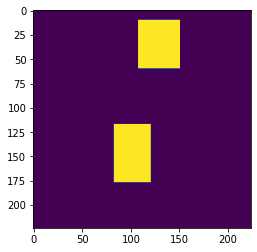

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


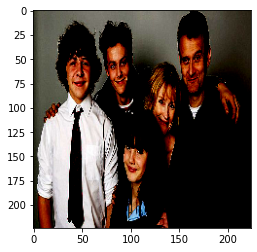


 Showing the masks for the input image


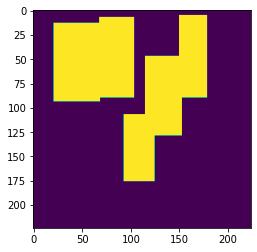

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


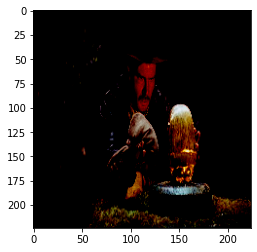


 Showing the masks for the input image


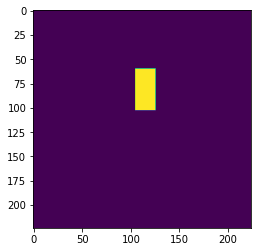

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Showing the input image


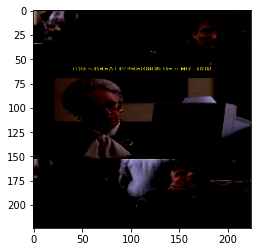


 Showing the masks for the input image


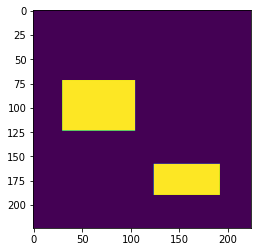


 Showing the input image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


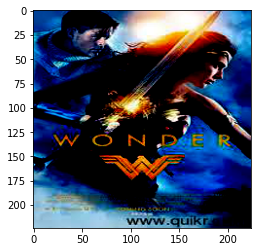


 Showing the masks for the input image


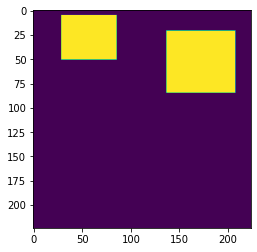

In [0]:
columns=3
rows=3
for i in range(1, columns*rows+1):
  print("\n Showing the input image")
  plt.imshow(X_train[i])
  plt.show()
  print("\n Showing the masks for the input image")
  plt.imshow(masks[i])
  plt.show()
#We have successfully drawn boundaries on the images on the faces

In [0]:
ALPHA = 1.0
Epochs = 50
Batch_size =1
Patience = 50

def Create_Model(trainable=True):
  model = MobileNet(input_shape=(IMAGE_HEIGHT,IMAGE_WIDTH,3),include_top=False,alpha=ALPHA,weights='imagenet')
  for layer in model.layers:
    layer.trainable=trainable # Mobilenet provides output image size of 7*7. 
  
  # Image resolution is lost as we do pooling and filter layers. So we resort to Unet architechture and upsample the lost resolution
  
  block = model.get_layer("conv_pw_1_relu").output # 112 * 112 image size
  block1 = model.get_layer("conv_pw_3_relu").output # 56 * 56 image size
  block2 = model.get_layer("conv_pw_5_relu").output # 28 * 28 image size
  block3 = model.get_layer("conv_pw_11_relu").output # 14 * 14 image size
  block4 = model.get_layer("conv_pw_13_relu").output # Final layer of mobile net . 7*7 image size

  x = Concatenate()([UpSampling2D()(block4), block3]) # Upsample the 7*7 by 2, and concatenate with the corr size of 14*14 layer -> Result 14 * 14
  x = Concatenate()([UpSampling2D()(x), block2]) # Upsample the 14*14 from prev layer by 2, and concatenate with block 2 size --> Result 28*28
  x = Concatenate()([UpSampling2D()(x), block1]) # Upsample the 28*28 from prev layer by 2, and concatenate with block 1 size --> Result 56*56
  x = Concatenate()([UpSampling2D()(x), block]) # Upsample the 56*56 by 2, and concatenate with block size --> Result 112*112
  x = UpSampling2D()(x) # Upsample it to 224*224
  x = Conv2D(1, kernel_size=1, activation="sigmoid")(x) # Returns a one single segmentation image mask for the face in the image
  
  x = Reshape((IMAGE_WIDTH, IMAGE_HEIGHT))(x) 

  return Model(inputs=model.input, outputs=x)

In [0]:
#tf.keras.backend.clear_session()

In [0]:
model = Create_Model()

# Print summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
17227776/17225924 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112

In [0]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [0]:
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", period=1)
stop = EarlyStopping(monitor="loss", patience=Patience, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=Patience, min_lr=1e-6, verbose=1, mode="min")

In [0]:
model.fit(x = X_train,y = masks,epochs=Epochs,batch_size= Batch_size ,callbacks=[checkpoint, reduce_lr, stop],shuffle=True,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 409 samples
Epoch 1/50
408/409 [============================>.] - ETA: 0s - loss: 1.4227 - dice_coefficient: 0.4326
Epoch 00001: loss improved from inf to 1.42145, saving model to model-1.42.h5
409/409 [==============================] - 34s 82ms/sample - loss: 1.4214 - dice_coefficient: 0.4328
Epoch 2/50
408/409 [============================>.] - ETA: 0s - loss: 0.8221 - dice_coefficient: 0.6021
Epoch 00002: loss improved from 1.42145 to 0.82329, saving model to model-0.82.h5
409/409 [==============================] - 21s 52ms/sample - loss: 0.8233 - dice_coefficient: 0.6014
Epoch 3/50
408/409 [============================>.] - ETA: 0s - loss: 0.6378 - dice_coefficient: 0.6693
Epoch 00003: loss improved from 0.82329 to 0.63748, saving model to model-0.64.h5
409/409 [==============================] - 21s 52ms/sample - loss: 0.6375 - dice_coefficient: 0.6694
Epoch 4/50
408/409 [========

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


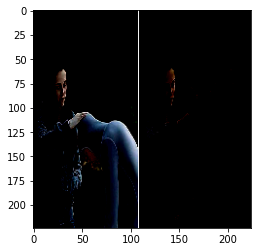

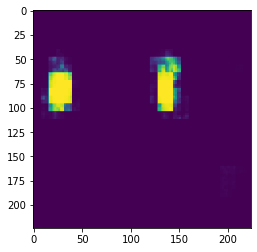

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


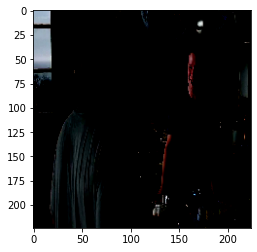

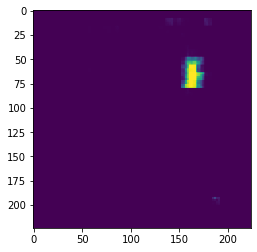

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


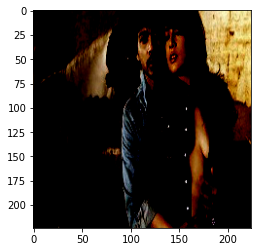

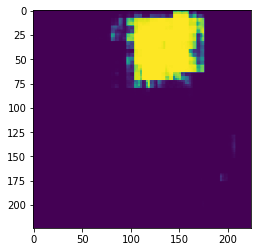

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


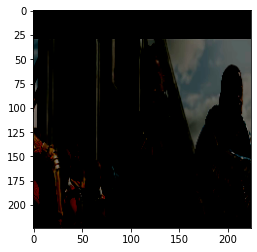

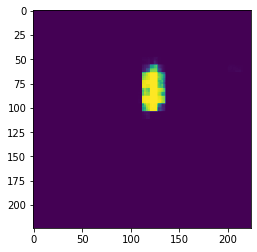

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


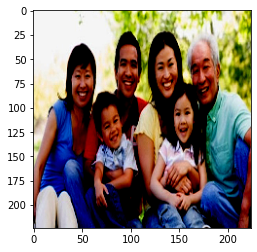

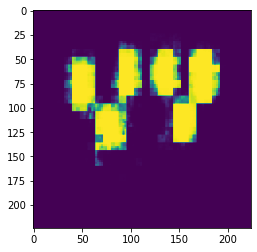

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


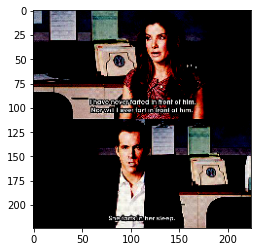

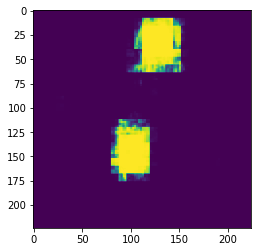

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


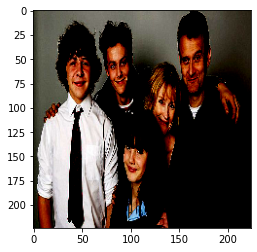

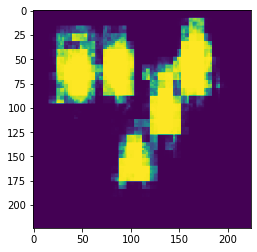

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


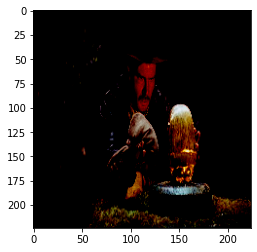

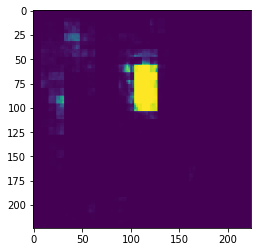

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


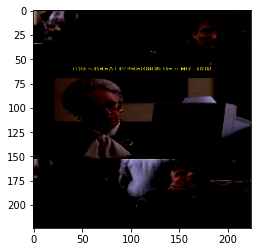

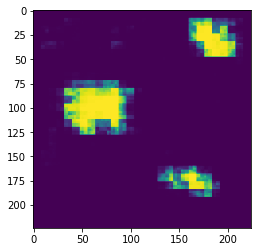

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


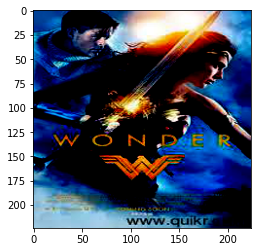

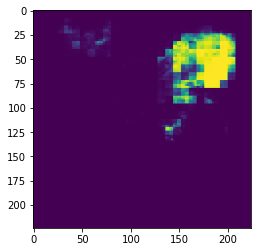

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


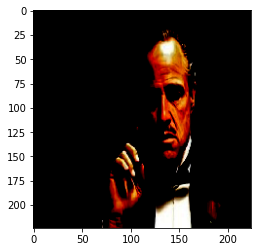

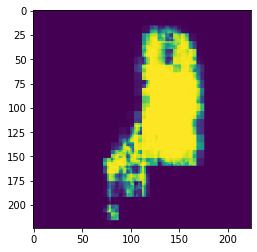

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


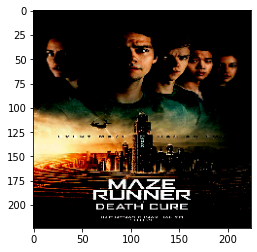

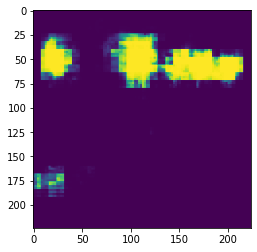

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


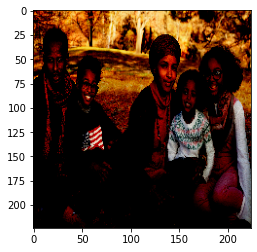

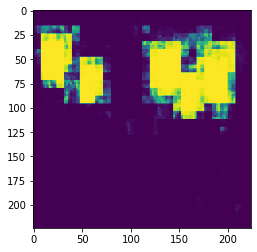

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


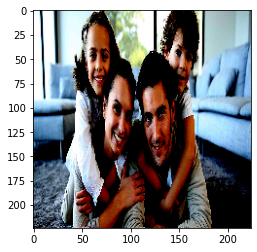

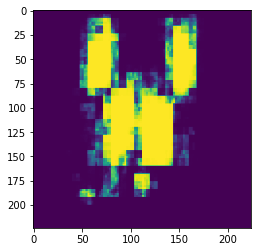

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


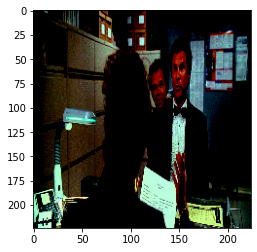

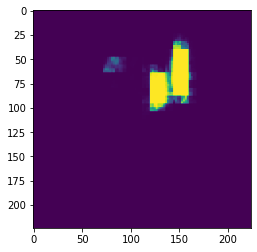

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


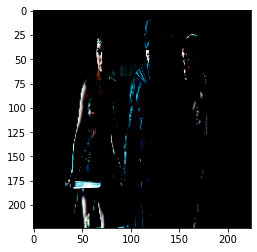

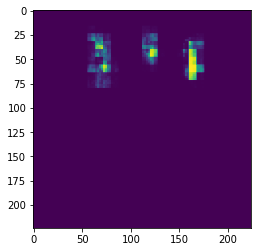

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


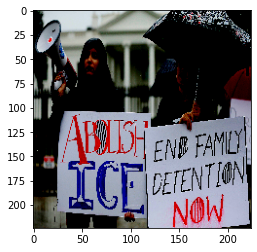

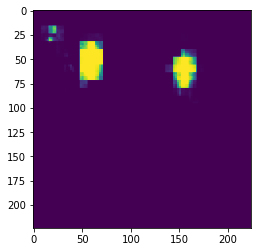

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


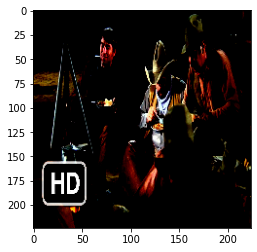

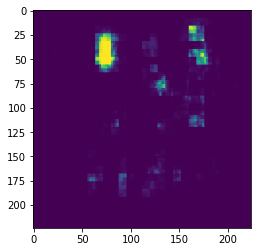

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


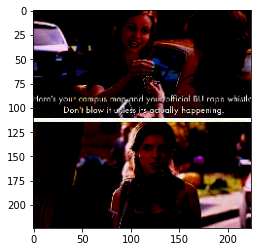

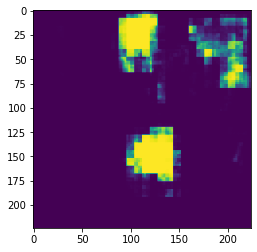

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


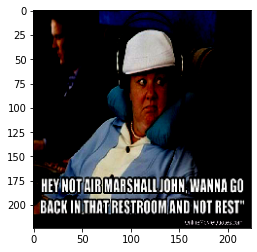

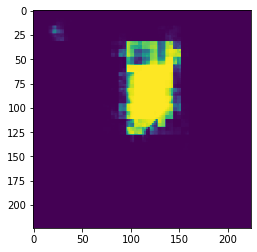

In [0]:
for n in range(0,20):
  sample_image = X_train[n]
  img_array = np.expand_dims(sample_image, axis=0)
  plt.imshow(sample_image)
  plt.show()
  prediction = model.predict(img_array)
  plt.imshow(prediction[0])
  plt.show()